In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from tfumap.paths import MODEL_DIR

In [3]:
dataset = 'cifar10'

In [4]:
from tfumap.load_datasets import load_CIFAR10, mask_labels

In [5]:
X_train, X_test, X_valid, Y_train, Y_test, Y_valid = load_CIFAR10(flatten=False)
X_train.shape

(40000, 32, 32, 3)

In [6]:
loc_df = pd.DataFrame([
    [1, 'cifar10_1.0_1024_1____2020_08_06_23_28_49_457258__learned-metric'],
    [4, 'cifar10_1.0_1024_4____2020_08_06_23_28_54_856662__learned-metric'],
    [16, 'cifar10_1.0_1024_16____2020_08_06_23_29_03_406042__learned-metric'],
    [64, 'cifar10_1.0_1024_64____2020_08_06_23_29_11_146344__learned-metric'],
    [256, 'cifar10_1.0_1024_256____2020_08_06_23_22_46_724759__learned-metric'],
    [512, 'cifar10_1.0_1024_1024____2020_08_06_23_12_19_608880__learned-metric'],
], columns = ['dims', 'loc_'])
loc_df

,dims,loc_
0,1,cifar10_1.0_1024_1____2020_08_06_23_28_49_4572...
1,4,cifar10_1.0_1024_4____2020_08_06_23_28_54_8566...
2,16,cifar10_1.0_1024_16____2020_08_06_23_29_03_406...
3,64,cifar10_1.0_1024_64____2020_08_06_23_29_11_146...
4,256,cifar10_1.0_1024_256____2020_08_06_23_22_46_72...
5,512,cifar10_1.0_1024_1024____2020_08_06_23_12_19_6...


In [7]:
loc_df['z'] = 1
loc_df['z'] = loc_df['z'].astype(object)
for idx, row in loc_df.iterrows():
    cpt_path = MODEL_DIR / 'semisupervised' / dataset / row.loc_
    last_layer_class = cpt_path / 'train_last_layer_class.npy'
    z_enc = cpt_path / 'train_z_enc.npy'
    umap_class = np.load(cpt_path / 'train_last_layer_class_umap.npy')
    loc_df.loc[idx, 'z']  = [umap_class]

In [8]:
loc_df

,dims,loc_,z
0,1,cifar10_1.0_1024_1____2020_08_06_23_28_49_4572...,"[[0.98762876, 18.556236], [5.823836, -6.669069..."
1,4,cifar10_1.0_1024_4____2020_08_06_23_28_54_8566...,"[[7.526813, -6.2734756], [-1.0953155, -0.03944..."
2,16,cifar10_1.0_1024_16____2020_08_06_23_29_03_406...,"[[-4.0459747, 4.694035], [7.6230164, 4.7916903..."
3,64,cifar10_1.0_1024_64____2020_08_06_23_29_11_146...,"[[-2.891749, 7.688], [3.719804, 7.407788], [5...."
4,256,cifar10_1.0_1024_256____2020_08_06_23_22_46_72...,"[[-8.601876, -2.4780993], [11.609006, -10.4222..."
5,512,cifar10_1.0_1024_1024____2020_08_06_23_12_19_6...,"[[12.086797, 4.443132], [9.960128, 18.59821], ..."


In [9]:
from scipy.spatial import procrustes

In [10]:
z0 = loc_df.loc[5, 'z']

In [17]:
from tfumap.paths import FIGURE_DIR, save_fig, ensure_dir

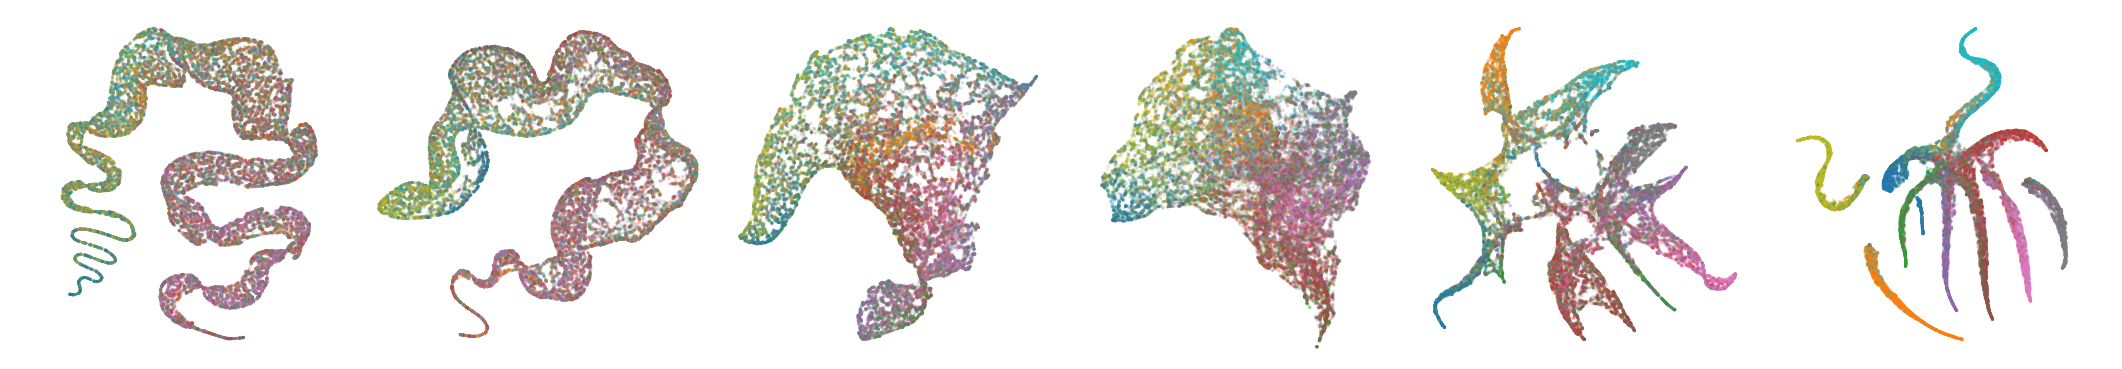

In [20]:
fig, axs = plt.subplots(ncols=6, figsize=(18, 3), dpi=150, gridspec_kw = {'wspace':0, 'hspace':0})
for i, (idx, row) in enumerate(loc_df.iterrows()):
    z = row.z
    z0_align, z_align, disparity = procrustes(z0, z)
    ax = axs[i]
    ax.scatter(
        z_align[:, 0], 
        z_align[:, 1], 
        s=0.25,
        c=Y_train, 
        cmap=plt.cm.tab10, 
        alpha = 0.25,
        rasterized=True
    )
    ax.axis("equal")
    n = 0.1
    xmin = np.percentile(z_align[:, 0], n)
    xmax = np.percentile(z_align[:, 0], 100 - n)
    ymin = np.percentile(z_align[:, 1], n)
    ymax = np.percentile(z_align[:, 1], 100 - n)
    # print(xmin, xmax, xmin, ymax)
    xdiff = (xmax - xmin) / 20
    ydiff = (ymax - ymin) / 20
    xmin = xmin - xdiff
    xmax = xmax + xdiff
    ymin = ymin - ydiff
    ymax = ymax + ydiff

    # print(xmin, xmax, xmin, ymax)
    ax.set_xlim([xmin, xmax])
    ax.set_ylim([ymin, ymax])

    ax.axis("off")
ensure_dir(FIGURE_DIR / 'semisupervised-projections')
save_fig(FIGURE_DIR / 'semisupervised-projections' / 'cifar10-learned-metric-no-augment', save_pdf=True)